# Lab Deep Learning / Multi-Layer Perceptron for regression / in pytorch

**Author: geoffroy.peeters@telecom-paris.fr**

For any remark or suggestion, please feel free to contact me.

Last edits:
- 2020/03/24 peeters (change dimensions order)
- 2020/04/27 peeters (added comments on W1, W2 initialization, added comments on A and B)
- 2021/05/05 peeters (add some documentation related to ```W1 -= ...```)
- 2023/05/10 peeters (typos corrections)
- 2024/05/02 peeters (link to do nn.Linear)

Read the "introduction to pytorch"
- slides: https://perso.telecom-paristech.fr/gpeeters/doc/pytorch/
- video: https://perso.telecom-paristech.fr/gpeeters/video/pytorch.mp4


## Objective:

The objective of this lab is to demonstrate the use of Neural Networks to perform non-linear regression.
We will use a simple NN with 1 hidden layer. The hidden layer has $n_h$ (you will test various values of $n_h$) hidden units and either a ```sigmoid```, ```relu``` or ```tanh``` activation.
Since we perform a regression task the output $\hat{y} \in \mathbb{R}$ and  there is no output activation (linear).

You will perform 1000 iterations (epochs) of SGD to find the parameters.

You will then apply the network to the two datasets A and B.

Note: for this lab, we do not separate the dataset into a train, validation and test part. We simply check the ```capacity``` of the network to model the training data.

**Question**: according to the obtained loss, discuss the choice of ```sigmoid```, ```relu``` or ```tanh```.
## ////////////////////////////////////////////////////////////////////////////
**Answer**  Activation Function Choice Based on Obtained Loss
The choice of activation function—**sigmoid**, **tanh**, or **ReLU**—has a direct impact on the training dynamics and the obtained loss. If the observed loss is high or decreases very slowly, the activation function might be contributing to inefficient learning. **Sigmoid** and **tanh** functions can suffer from *saturation*, especially for inputs with large magnitude, causing gradients to vanish and leading to slower convergence. Between the two, **tanh** is generally preferred in hidden layers due to its zero-centered output.

In contrast, **ReLU (Rectified Linear Unit)** avoids the vanishing gradient problem for positive inputs by allowing unbounded positive outputs. This typically enables faster and deeper learning, and often results in a lower final loss. However, ReLU can cause some neurons to "die" if their inputs become and stay negative.

if the obtained loss is unsatisfactory, switching from **sigmoid** or **tanh** to **ReLU** in hidden layers is often beneficial. **Sigmoid** should be reserved for output layers in binary classification tasks where probabilities are needed. Always monitor the loss and gradients during training to validate the effectiveness of your activation function choice.

## ////////////////////////////////////////////////////////////////////////////

### Data normalization

You should normalize the data to zero mean and unit standard deviation

### Model

There are various ways to write a NN model in pytorch.

In this lab, you will write three different implementations:
- **Model A**: manually defining the parameters (W1,b1,w2,b2), writting the forward equations, writting the loss equation, calling the .backward() and manually updating the weights using W1.grad. You will write the loop to perform 1000 epochs.
- **Model B**: using the Sequential class of pytorch
- **Model C**: a custom torch.nn.Module class for this.

For Model B and C, you will use the ready made loss and optimization from the nn and optim packages. You can use the same code to optimize the parameters of Model B and C.

### Loss

Since we are dealing with a regression problem, we will use a Mean Square Error loss: write it by-hand for Model A and use ```torch.nn.MSELoss``` for Model B and C.

### Parameters update/ Optimization

For updating the parameters, we will use as optimizer a simple SGD algorithm (use ```torch.optim.SGD``` for Model B and C) with a learning rate of 0.05.

Don't forget that an optimizer is applied to a set of parameters (```my_model.parameters()``` gives the parameters of the network for Model B and C).
Once the gradients have been computed (after the backpropagation has been performed), you can perform one step of optimization (using ```optimizer.step()``` for Model B and C).

### Backward propagation

Backpropagation is automatically performed in pytorch using the ```autograd``` package.
First, reset the gradients of all parameters (using ```optimizer.zero_grad()``` for Model B and C), then perform the backpropagation ```loss.backward()```.

### Regularization

- How can you add a Ridge (L2) regularization ? this can be done easely within the definition of the ```optimizer```.
- How can you add a Lasso (L1) regularization ? this has to be done manually at each iteration, by adding something to the loss before backpropagation.

**Question**: discuss the use of the Ridge and Lasso regularization for each dataset.
### //////////////////////////////////////////////////////////////////////////
**Answer**
Ridge and Lasso regularization are used to prevent overfitting by penalizing large weights. **Ridge** applies an L2 penalty and is effective when most features contribute to the output, especially in cases of multicollinearity. It shrinks coefficients but does not eliminate them. **Lasso**, using an L1 penalty, is ideal when only a few features are important, as it can drive irrelevant coefficients to exactly zero, effectively performing feature selection. For datasets with many features but only a few relevant ones, **Lasso** is preferred. When all features are somewhat informative, **Ridge** is more suitable. If the situation is unclear, an Elastic Net (a combination of both) can be a robust choice.
### //////////////////////////////////////////////////////////////////////////

## Your task:

You need to add the missing parts in the code (parts between ```# --- START CODE HERE``` and ```# --- END CODE HERE```)

## Load the python packages

In [62]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt

## Datasets

We will use two different datasets. For both $x$ has dimensions $(m,n_{in}=1)$ and $y$ has dimensions $(m,n_{out}=1)$ where $m$ is the number of examples.



In [63]:
def F_do_dataset_parab(m):
    x_data = torch.linspace(-1, 1, m)
    noise_data = 0.2*torch.rand(m)
    y_data = x_data.pow(2) + noise_data

    # --- change vectos to matrix
    x_data = torch.unsqueeze(x_data, dim=1)
    y_data = torch.unsqueeze(y_data, dim=1)
    return x_data, y_data

def F_do_dataset_sin(m):
    x_data = torch.arange(0, m, dtype=torch.float32)
    noise_data = 0.2*torch.rand(m)
    y_data = torch.sin(2*np.pi*x_data*0.001) + noise_data

    # --- change vectos to matrix
    x_data = torch.unsqueeze(x_data, dim=1)
    y_data = torch.unsqueeze(y_data, dim=1)
    return x_data, y_data

size of x_data: torch.Size([100, 1])
size of y_data: torch.Size([100, 1])


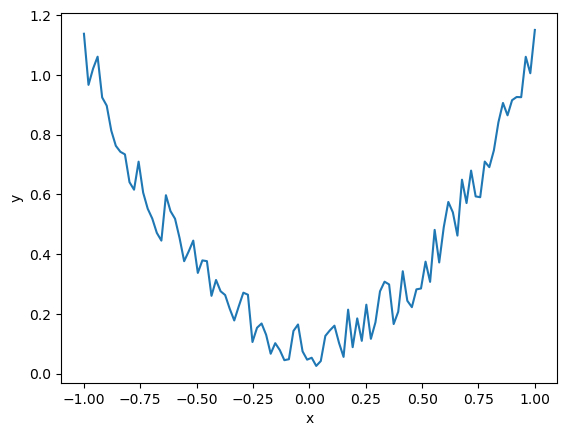

In [64]:
# --- Dataset 1
x_data1, y_data1 = F_do_dataset_parab(m=100)
# --- Dataset 2
#x_data, y_data = F_do_dataset_sin(m=3000)

plt.plot(x_data1.numpy(), y_data1.numpy());
plt.xlabel('x'), plt.ylabel('y');

print('size of x_data:', x_data1.size())
print('size of y_data:', y_data1.size())

size of x_data: torch.Size([3000, 1])
size of y_data: torch.Size([3000, 1])


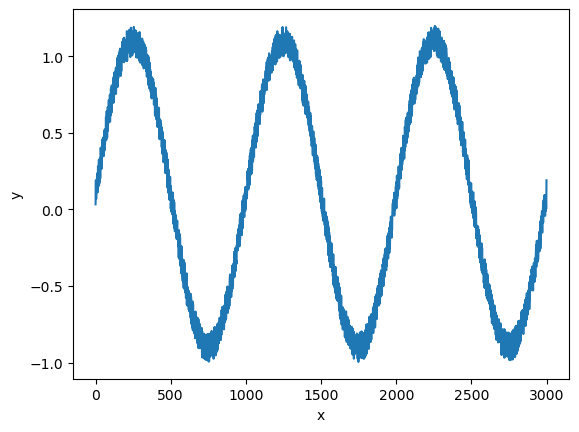

In [65]:
# --- Dataset 1
#x_data, y_data = F_do_dataset_parab(m=100)
# --- Dataset 2
x_data, y_data = F_do_dataset_sin(m=3000)

plt.plot(x_data.numpy(), y_data.numpy());
plt.xlabel('x'), plt.ylabel('y');

print('size of x_data:', x_data.size())
print('size of y_data:', y_data.size())

## Data standardization

We standardize the input data (substract mean and divide by standard-deviation)

In [66]:
# --- START CODE HERE (01)
x_data = (x_data - x_data.mean()) / x_data.std()
y_data = (y_data - y_data.mean()) / y_data.std()


x_data1 = (x_data1 - x_data1.mean()) / x_data1.std()
y_data1 = (y_data1 - y_data1.mean()) / y_data1.std()


# --- END CODE HERE

## Hyper-parameters definition

In [67]:
n_in = 1
n_h = 10
n_out = 1

nb_epoch = 20000
learning_rate_alpha = 0.05
param_momentum = 0.01
param_L1_weight = 0.001
param_L2_weight = 0.01

## Model A (writting the network equations)

For model A, you will define the variables and write the equations of the network yourself (as you would do in numpy).
However you will use ```torch tensors``` instead of ```numpy array```.

***Why ?*** because torch tensors will allows you to automatically get the gradient. You will use ```loss.backward()``` to launch the backpropagation from the ```loss``` variable.
Then, for all torch tensors you have created and for which you have declared ```requires_grad=True```, you will get the gradient of ```loss```with respect to this variable in the field ```.grad```.

***Example*** ```W1 = torch.tensors(..., requires_grad=True)``` ... ```loss.backward()``` will have the gradient $\frac{d Loss}{d W1}$in ```W1.grad```.

### Initialize the variables

**Note**: In order to avoid neuron saturation and that all the neurons learn the same thing, the matrix should be initialized to a small random value (see https://pytorch.org/docs/stable/generated/torch.nn.Linear.html for details). Because of this, W1 and W2 should be first define as small random; **then** set to ```requires_grad=True```.

In [68]:
# --- START CODE HERE (02)
W1 = torch.randn(n_in,n_h,requires_grad=True)
b1 = torch.randn(n_h,requires_grad=True)
W2 = torch.randn(n_h,n_out,requires_grad=True)
b2 = torch.randn(n_out,requires_grad=True)
# --- END CODE HERE

### Define the model

We will denote by ```H``` the pre-activation (value before the non-linearity) and by ```A``` the activation (value after the non-linearity).

In [69]:
def model(X):

    # --- H is the results of the first projection
    # --- H is then transformed by a non-linearity to A

    # --- START CODE HERE (03)
    H = torch.mm(X,W1) + b1
    A = torch.sigmoid(H)
    y_pred = torch.mm(A,W2) + b2
    # --- END CODE HERE
    return y_pred

### Train the model

**Note**: when updating the parameters (W1,b1,W2,b2) you should use an "in-place" update: ```W1 -= ...``` instead of ```W1 = W1 - ...```; otherwise ```W1``` will be replaced by its value and its gradient field will not exist anymore.

In [70]:
learning_rate_alpha=0.05

In [71]:
for epoch in range(0, nb_epoch):
    # --- X (m, n_in)
    # --- Y (m, n_out)
    # --- START CODE HERE (04)
    y_pred = model(x_data)
    loss = torch.mean((y_pred - y_data)**2) # MSE
    # --- END CODE HERE

    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss))

    loss.backward()

    with torch.no_grad():
        # --- START CODE HERE (05)
        W1 -= learning_rate_alpha * W1.grad
        b1 -= learning_rate_alpha * b1.grad
        W2 -= learning_rate_alpha * W2.grad
        b2 -= learning_rate_alpha * b2.grad
        # --- END CODE HERE
        W1.grad.zero_()
        b1.grad.zero_()
        W2.grad.zero_()
        b2.grad.zero_()


epoch 0, loss 1.3348745107650757
epoch 1000, loss 0.9161857962608337
epoch 2000, loss 0.889198899269104
epoch 3000, loss 0.8707219958305359
epoch 4000, loss 0.8518164753913879
epoch 5000, loss 0.820562481880188
epoch 6000, loss 0.7652892470359802
epoch 7000, loss 0.683355450630188
epoch 8000, loss 0.5403016209602356
epoch 9000, loss 0.34321853518486023
epoch 10000, loss 0.21692369878292084
epoch 11000, loss 0.17052516341209412
epoch 12000, loss 0.15553893148899078
epoch 13000, loss 0.14958612620830536
epoch 14000, loss 0.14606943726539612
epoch 15000, loss 0.14320528507232666
epoch 16000, loss 0.14053019881248474
epoch 17000, loss 0.13793498277664185
epoch 18000, loss 0.13540346920490265
epoch 19000, loss 0.13294288516044617


### Plotting the results

We will super-impose the biases of the first layer to better understand how the model has fit the sinusoidal curve. Please explain what it does.

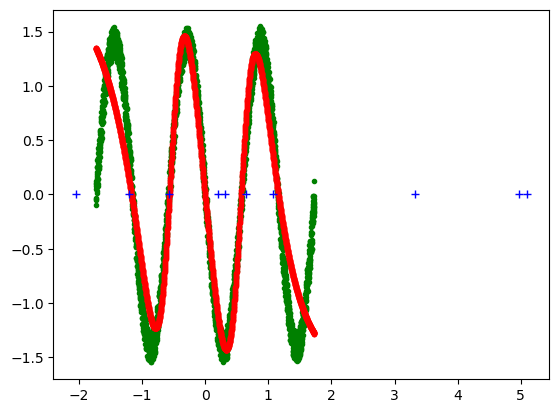

In [72]:
# ----------------
plt.plot(x_data.numpy(), y_data.numpy(), 'g.');
plt.plot(x_data.numpy(), y_pred.detach().numpy(), 'r.');
# super-impose the biases of the first layer
plt.plot(b1.detach().numpy(), np.zeros((10,1)), 'b+');

## Model B (using Sequential class)

Here, you will write the network using the nn.Sequential class.
With this you can use the ready-made layers ``torch.nn.Linear``,``torch.nn.Tanh``, ...

In [73]:
# --- START CODE HERE (06)
modelb = nn.Sequential(
    nn.Linear(n_in, n_h),
    nn.Tanh(),
    nn.Linear(n_h, n_out),
)
# --- END CODE HERE

## Model C (using a class definition)

Here, you will write the network using the recommended pytorch way; i.e. by defining a class.
This class inherit from the main class ```torch.nn.Module```.
You only need to write the ```__init__``` method and the ```forward``` method.

In object programming, the ```__init__``` method defines the attributes of your class. Since the attributes of your  network are the parameters to be trained (weights and biases), you should declare in the ```__init``` all the layers that involve parameters to be trained (mostly the ```Linear```layers which perform the matrix multiplication).

The ```forward``` method contains the code of the forward pass itself. It can of course call attributes defined in the ```__init___``` method. It is the method used when calling ```model(x)```.

As before, the model created will have all its parameters accessible as a dictionary and can be accessed using ```model.parameters()```.

Classes are convenient way to write more complex network than what you can do with ```nn.sequential```. Note that you can actually include a ```nn.sequential``` in your class.

In [74]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # --- START CODE HERE (07)
        self.linear1 = nn.Linear(n_in, n_h)
        self.linear2 = nn.Linear(n_h, n_out)
        # --- END CODE HERE

    def forward(self, x):

        # --- START CODE HERE (08)
        x = torch.tanh(self.linear1(x))
        y_pred = self.linear2(x)
        # --- END CODE HERE

        return y_pred

# --- START CODE HERE (08)
modelc = Net()
# --- END CODE HERE

## Model B+C

### Criterion and Optimization

The code of Model A is self-contained, i.e. it already contains all necessary instruction to perform forward, loss, backward and parameter updates.

When using ```nn.sequential``` (model B) or a class definition of the network (model C), we still need to define
- what we will minimize (the loss to be minimized, i.e. Mean-Square-Error or Binary-Cross-Entropy). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)
- how we will minimize the loss, i.e. what parameter update alogirhtms we will use (SGD, momentum). We can of course write the equation of it by hand but pytorch comes with a very large number of pre-build loss functions (within ```torch.nn```)

L2 regularization can be done directly in the optimizer under the name ```weight_decay```.

In [75]:
# --- START CODE HERE (09)
criterion = nn.MSELoss()
optimizerb = optim.SGD(modelb.parameters(), lr=learning_rate_alpha)
optimizerc = optim.SGD(modelc.parameters(), lr=learning_rate_alpha)
# --- END CODE HERE

### Training

Having defined the network, the citerion to be minimized and the optimizer, we then perform a loop over epochs (iterations); at each step we
- compute the forward pass by passing the data to the model: ```haty = model(x)```
- compute the the loss (the criterion)
- putting at zero the gradients of all the parameters of the network (this is important since, by default, pytorch accumulate the gradients over time)
- computing the backpropagation (using as before ```.backward()```)
- performing one step of optimization (using ```.step()```)

In [76]:
loss_l = []
for epoch in range(nb_epoch):

    # --- START CODE HERE (10)
    y_pred = modelb(x_data)
    loss = criterion(y_pred, y_data)
    optimizerb.zero_grad()
    loss.backward()
    optimizerb.step()
    # --- END CODE HERE

    loss_l.append(loss)
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 1.2033582925796509
epoch 1000, loss 0.8974536657333374
epoch 2000, loss 0.8208796381950378
epoch 3000, loss 0.7075195908546448
epoch 4000, loss 0.15373407304286957
epoch 5000, loss 0.11097793281078339
epoch 6000, loss 0.1004437655210495
epoch 7000, loss 0.09277693927288055
epoch 8000, loss 0.08627066016197205
epoch 9000, loss 0.08047227561473846
epoch 10000, loss 0.07522644847631454
epoch 11000, loss 0.07035768032073975
epoch 12000, loss 0.06535011529922485
epoch 13000, loss 0.05948799103498459
epoch 14000, loss 0.05385769531130791
epoch 15000, loss 0.048175327479839325
epoch 16000, loss 0.04197559133172035
epoch 17000, loss 0.03545276075601578
epoch 18000, loss 0.029210656881332397
epoch 19000, loss 0.023808659985661507


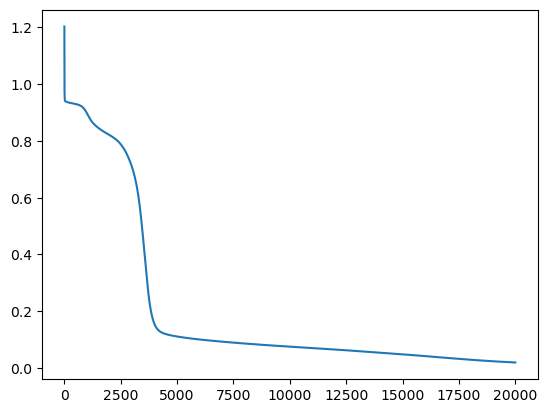

In [77]:
# ----------------
plt.plot([loss.detach().numpy() for loss in loss_l]);

In [78]:
loss_lc = []
for epoch in range(nb_epoch):

    # --- START CODE HERE (10)
    y_pred1 = modelc(x_data1)
    loss = criterion(y_pred1, y_data1)
    optimizerc.zero_grad()
    loss.backward()
    optimizerc.step()
    # --- END CODE HERE

    loss_lc.append(loss)
    if epoch % 1000 == 0:
        print('epoch {}, loss {}'.format(epoch, loss.data))

epoch 0, loss 0.9233499765396118
epoch 1000, loss 0.04092652350664139
epoch 2000, loss 0.03644552826881409
epoch 3000, loss 0.03527362644672394
epoch 4000, loss 0.034681033343076706
epoch 5000, loss 0.03426053375005722
epoch 6000, loss 0.03391944244503975
epoch 7000, loss 0.03362230584025383
epoch 8000, loss 0.03334945812821388
epoch 9000, loss 0.03308817371726036
epoch 10000, loss 0.03282957896590233
epoch 11000, loss 0.03256821259856224
epoch 12000, loss 0.03230201080441475
epoch 13000, loss 0.03203224018216133
epoch 14000, loss 0.03176169842481613
epoch 15000, loss 0.031492866575717926
epoch 16000, loss 0.031227685511112213
epoch 17000, loss 0.030968651175498962
epoch 18000, loss 0.03071964718401432
epoch 19000, loss 0.0304854828864336


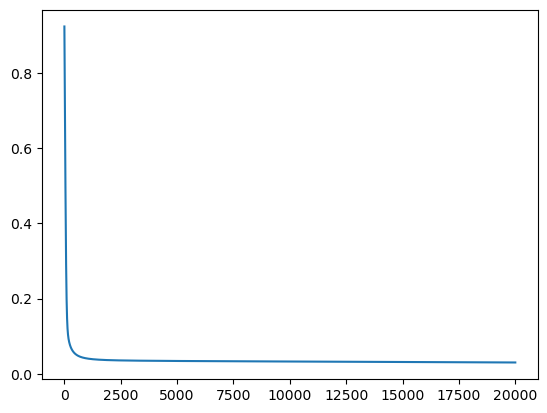

In [80]:
# ----------------
plt.plot([loss.detach().numpy() for loss in loss_lc]);

### Plotting results

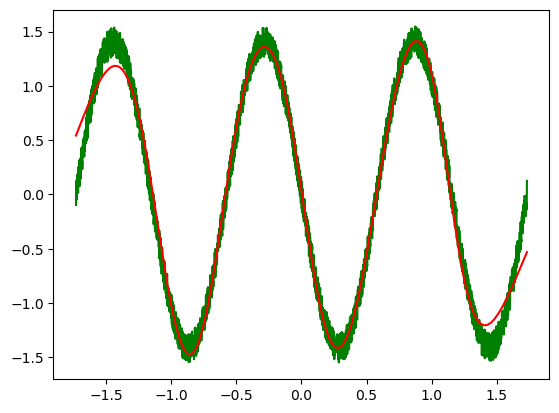

In [81]:
# ----------------
plt.plot(x_data.numpy(), y_data.numpy(), 'g')
plt.plot(x_data.numpy(), y_pred.detach().numpy(), 'r')

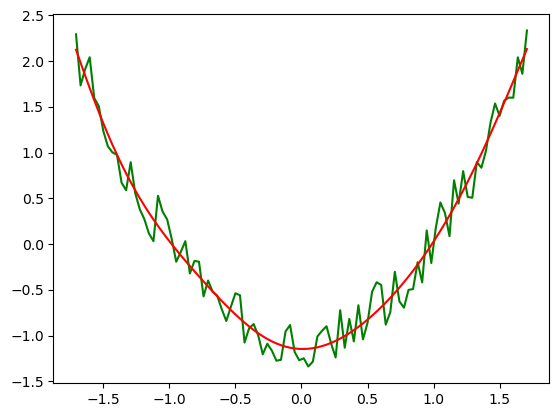

In [82]:
# ----------------
plt.plot(x_data1.numpy(), y_data1.numpy(), 'g')
plt.plot(x_data1.numpy(), y_pred1.detach().numpy(), 'r')

### Display the weights and the biases

Now, we want to check the effect of L1 regularization. For this you will plot the values of the weights of each layers.

[[ 1.336807 ]
 [ 3.1736956]
 [-1.4284976]
 [-1.577181 ]
 [-3.8444455]
 [-2.9902754]
 [ 4.4418306]
 [-1.2946322]
 [-3.4270282]
 [-3.6175292]]
[-2.0695732  -1.7417156  -0.5814026  -0.32369617  0.09722161 -2.4749181
 -5.0003257  -1.9979702  -2.269824   -4.064554  ]
[[ 2.4259012   2.3167095  -0.15728547  0.14870396  2.5667052   1.9062772
  -2.6614227  -3.0005612  -3.5664427   2.7034898 ]]
[-0.18895501]


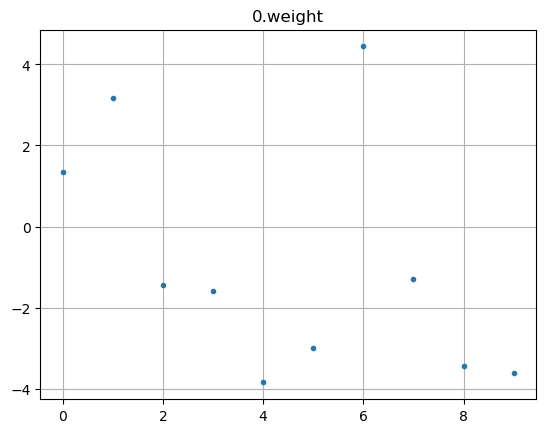

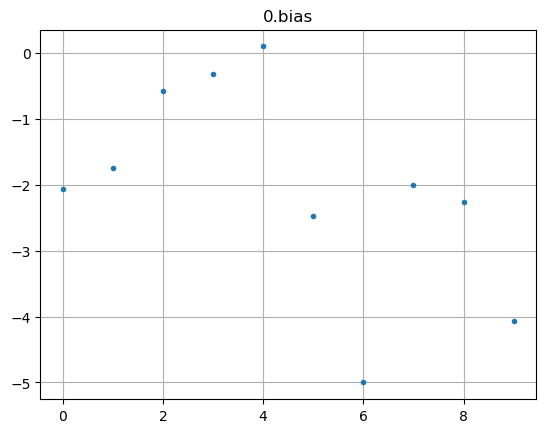

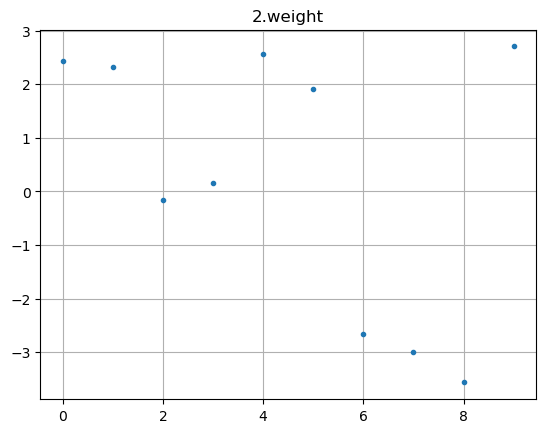

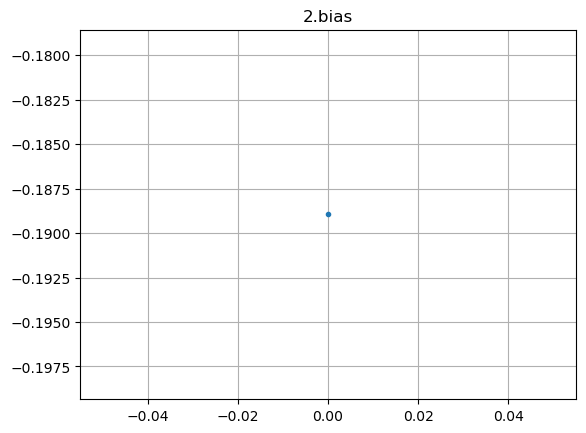

In [83]:
list_l = [{'name':name, 'data':layer.data} for name, layer in modelb.named_parameters()]
for tmp in list_l:
    plt.figure()
    plt.plot(tmp['data'].flatten().numpy(), '.')
    plt.title(tmp['name'])
    plt.grid(True)
    print(tmp['data'].numpy())

[[-0.0180246 ]
 [ 1.6328775 ]
 [-1.4124148 ]
 [-0.7873818 ]
 [-0.79099935]
 [ 0.76194125]
 [ 1.6461905 ]
 [-0.8251476 ]
 [ 0.021189  ]
 [ 1.1483326 ]]
[-1.5610433   2.928942    2.3980956  -0.41140947  0.7511446  -1.2640824
  0.8145415   0.68587613  0.9193347  -0.31599846]
[[-2.1400151  -2.4586153  -1.6337956   0.62074524 -0.6060928   0.7882681
  -0.7448752  -0.25230208  0.9573393   0.41373944]]
[2.3273203]


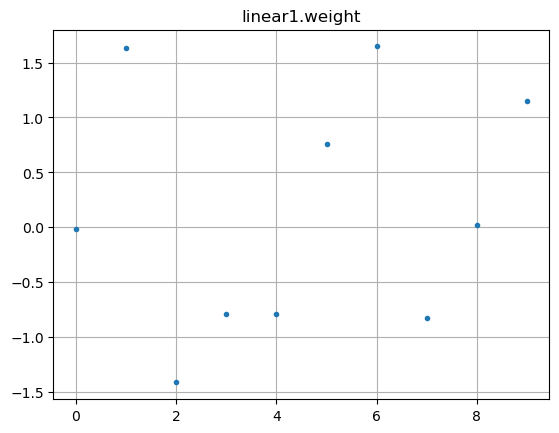

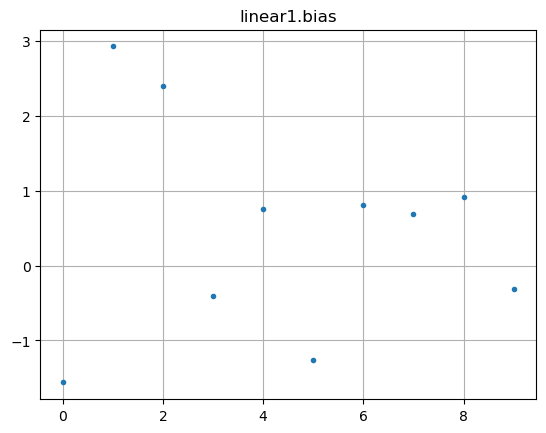

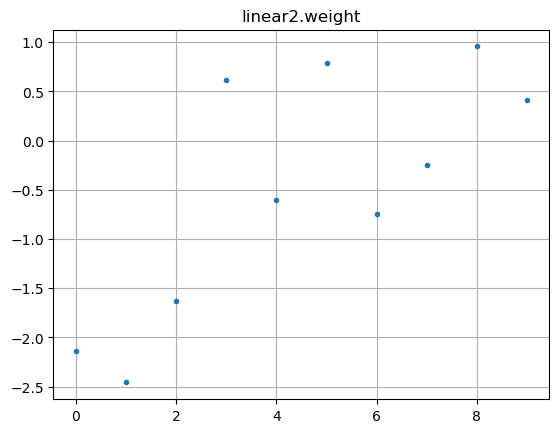

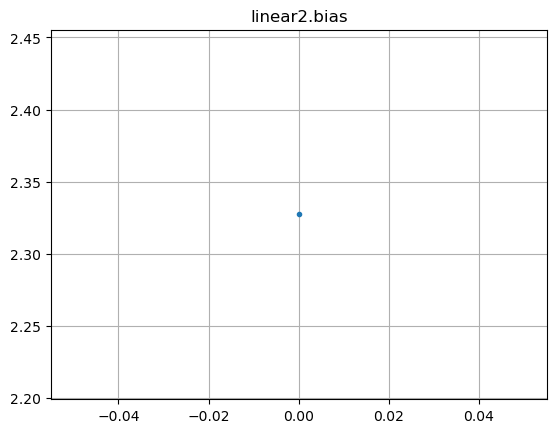

In [84]:
list_l = [{'name':name, 'data':layer.data} for name, layer in modelc.named_parameters()]
for tmp in list_l:
    plt.figure()
    plt.plot(tmp['data'].flatten().numpy(), '.')
    plt.title(tmp['name'])
    plt.grid(True)
    print(tmp['data'].numpy())